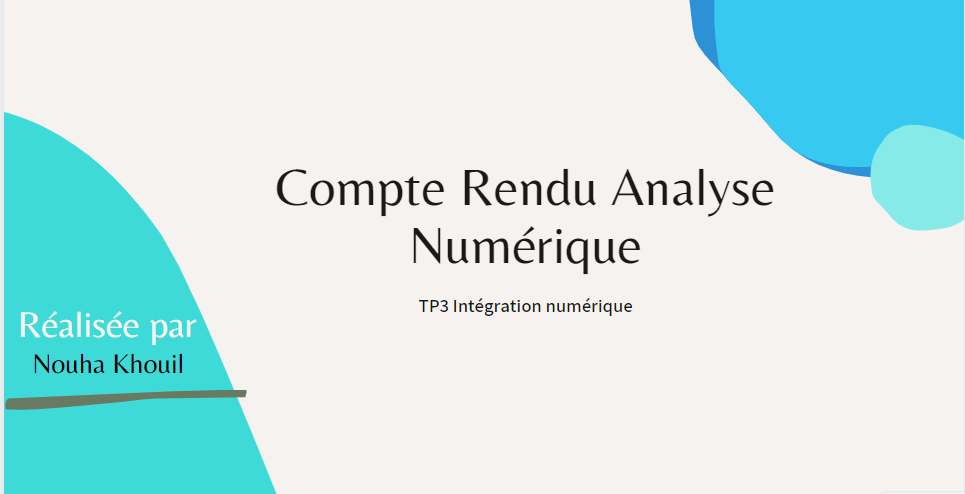

<center>
<h1>Intégration numérique<h1>

Si f est une fonction continue sur un intervalle [a,b], bien souvent on ne sait pas calculer une primitive de f.<br> Ainsi, si l'on désire obtenir la valeur de $\int_{a}^{b} f(t) d t$ , il faut parfois se contenter d'obtenir une valeur approchée à l'aide d'une méthode d'intégration numérique.<br>
  La plupart des méthodes d'intégration numérique fonctionnent sur le même principe. On commence par couper le gros intervalle [a,b] en N plus petits intervalles $\left[a_{i}, a_{i+1}\right],$ avec $a_{1}=a$ et $a_{N+1}=b$. Puis, pour chaque intervalle $\left[a_{i}, a_{i+1}\right],$ on essaie d'approcher $\int_{a_{i}}^{a_{i+1}} f(t) d t$.
  <br>Les moyens les plus simples sont :
  <br>

<h3> La méthode des rectangles à gauche:</h3><br>  on approche  par $\int_{a_{i}}^{a_{i+1}} f(t) d t \quad$ par $\left(a_{i+1}-a_{i}\right) f\left(a_{i}\right)$ .<br> Géométriquement, cela signifie qu'on approche l'intégrale de f par l'aire des rectangles hachurés en vert :


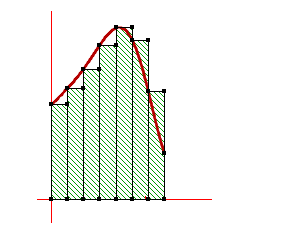

In [53]:
#pip install ipympl    

In [54]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import ipympl

In [55]:
f=lambda x:1/(1+x**2)

In [56]:
class RectangleG ( object ) :
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
    def integrate ( self , f ) :
        x= self.x
        y= [f( xx ) for xx in x]
        h = float( x[1] - x[0] )
        s = sum( y[ 0 : -1 ] )
        return h * s
    def Graph ( self , f , resolution =1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] # abscisses des sommets
            y_rect = [0 , yl[ i ] , yl[ i ] , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine )
        plt.plot(xl, yl,"bo")
        plt.xlabel ( 'x' )
        plt.ylabel ( ' f ( x ) ' )
        #plt.title ( ' Methode des rectangles gauches' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

    

In [57]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

In [58]:
def simul1(n,a,b,f):
    R=RectangleG(-1,1,n,f)
    return R.Graph(f)


In [69]:
R=RectangleG(-1,1,55,f)
r=RectangleG(-1,1,5,f)
fig= plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title ( ' Methode des rectangles gauches avec n=55' )
R.Graph(f)
plt.subplot(1,2,2)
plt.title ( ' Methode des rectangles gauches avec n=5' )
r.Graph(f)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [59]:
np.pi/2

1.5707963267948966

<b> On remarque que plus le nombre de subdivision augmente plus la valeur d'approche prés de valeur exacte de l'integrale

<h3> La méthode des trapèzes:</h3><br> on approche $\int_{a_{i}}^{a_{i+1}} f(t) d t$ par $\left(a_{i+1}-a_{i}\right) \frac{f\left(a_{i}\right)+f\left(a_{i+1}\right)}{2}$ <br> Géométriquement, cela signifie qu'on approche l'intégrale de f par I'aire des trapèzes hachurés en marron :

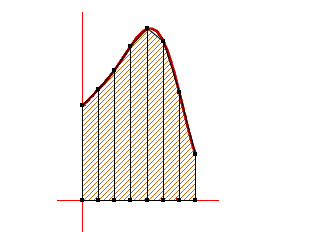

In [60]:
class Trapezoidal(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y= [f( xx ) for xx in x]
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0

    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.plot(xl, yl,"cs")#point support
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des Trapèzes' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

<h3> La méthode de Simpson:</h3><br>
permet le calcul approché d’une intégrale avec la formule suivante :$\int_{a}^{b} f(x) d x \approx \frac{b-a}{6}\left[f(a)+4 f\left(\frac{a+b}{2}\right)+f(b)\right]$

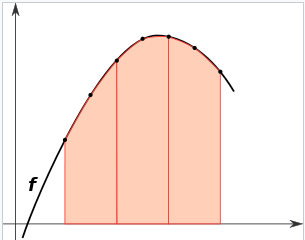

In [61]:
class Simpson(object):
    def __init__(self, a, b, n, f): 
        self.a = a
        self.b = b
        self.x = np.linspace(a,b,n+1)#les pts supports
        self.f = f
        self.n = n 

    def integrate(self,f):
        x=self.x 
        y=f(x) 
        h = float(x[1] - x[0])
        n = len(x) - 1
        if n % 2 == 1:
            n -= 1
        s = y[0] + y[n] + 4.0 * sum(y[1:-1:2]) + 2.0 * sum(y[2:-2:2])
        return h * s / 3.0
    def Graph(self,f,resolution=1001):#1000 points 1001 résolution juste pour dessiner f
        xl = self.x #pt support
        yl = f(xl) #yi
        xlist_fine=np.linspace(self.a, self.b, resolution)
        # pour le graph de la fonction f #intervalle ab subdiviser en 1000 poitns
        for i in range(self.n):#range intervalle 0 à n
            xx=np.linspace(xl[i], xl[i+1], resolution)
            #pour chaque subdivisuion  on doit dessiner polynome dnc on doit aussi le subdiviser
            m=(xl[i]+xl[i+1])/2#pt milieu
            a=xl[i]#borne gauche
            b=xl[i+1]#borne droite
            l0 = (xx-m)/(a-m)*(xx-b)/(a-b)
            l1 = (xx-a)/(m-a)*(xx-b)/(m-b)
            l2 = (xx-a)/(b-a)*(xx-m)/(b-m)
            P = f(a)*l0 + f(m)*l1 + f(b)*l2#fonction dde polynome
            plt.plot(xx,P,'m')#dessiner polynome d'interpolation
        yflist_fine = f(xlist_fine)#fontion f
        plt.plot(xlist_fine, yflist_fine,'b')
        plt.plot(xl, yl,'rs')#point support en bleu rond
        
        plt.ylabel('f(x)')
        plt.title('Méthode de Simpson')
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

In [73]:
"""S=Simpson(-1,1,5,f)
R.integrate(f)
S.Graph(f)"""

'S=Simpson(-1,1,5,f)\nR.integrate(f)\nS.Graph(f)'

In [70]:
def sim(n,a,b,f):
    R=RectangleG(a,b,n,f)
    T=Trapezoidal(a,b,n,f)
    S=Simpson(a,b,n,f)
    fig= plt.figure(figsize=(12,10))
    plt.subplot(2,2,1)
    R.Graph(f)  
    plt.subplot(2,2,2)    
    T.Graph(f)
    plt.subplot(2,2,3)    
    S.Graph(f)
    plt.show()

In [71]:
sim(10,-1,1,f)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [65]:
interact(sim,n=widgets.IntSlider(min=1, max=100, step=3, value=5),
         a = widgets.IntSlider(min=-1, max=5, value=-1),
         b = widgets.IntSlider(min=0, max=10, value=1),
        f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

interactive(children=(IntSlider(value=5, description='n', min=1, step=3), IntSlider(value=-1, description='a',…

In [77]:
# create some control elements
interact=widgets.Dropdown(
                        options=[('Méthode des réctangles gauches', 1), 
                                 ('Méthode des Trapèze', 2) ,('Méthodes de Simpson', 3)],
                        value=2,
                        description='Méthode:',
                        )
text_func = widgets.Text(value='cos(x)', description='Fonction', continuous_update=False)
text_a = widgets.Text(value='-1', description='a', continuous_update=False)
text_b = widgets.Text(value='1', description='b', continuous_update=False)
text_n = widgets.Text(value='5', description='n', continuous_update=False)
text_int = widgets.Text(value='', description='I_n', continuous_update=True)
button = widgets.Button(description="Calculer")
####################################
def sim(b):
    dic={1:RectangleG,2:Trapezoidal,3:Simpson}
    m=methode.value
    plt.cla()
    func=lambda x:eval(text_func.value)
    R=dic[m](float(text_a.value), float(text_b.value),int(text_n.value),func)
    R.Graph(func)
    text_int.value=str(R.integrate(func))
    text_int.description='I_'+text_n.value
def update_a(change):
    change.new    
def update_b(change):
    change.new
def update_n(change):
    change.new
def update_f(change):
    change.new
###################################
button.on_click(sim)
##########################
text_func.observe(update_f, 'value')
text_a.observe(update_a, 'value')
text_b.observe(update_b, 'value')

In [78]:
output = widgets.Output()
if plt.gcf().number>=2:
        for i in range(2,plt.gcf().number):
            plt.close(i)
with output:
    fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))     
fig.canvas.toolbar_position = 'bottom'

In [79]:
def make_boxes():
    vbox1 = widgets.VBox([interact, text_func,text_a,text_b,text_n,button,text_int])
    vbox2 = widgets.VBox([ fig.canvas])
    return vbox1, vbox2
box_layout = widgets.Layout(
        border='solid 2px gray',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px')
 
vbox1, vbox2 = make_boxes()
 
vbox1.layout = box_layout
vbox2.layout = box_layout

widgets.HBox([vbox1, vbox2])